# 图像轮廓

# 1. 图像轮廓简介

① 边缘有一些零零散散的线段也可以当做边缘，反正梯度上下左右发生差异，就把它当做边缘了。

② 图像的轮廓必须是一个整体，不是零零散散的，而是连在一块的。

③ 图像轮廓函数：cv2.findContours(img,mode,method)

mode：轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓。
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中。
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界。
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次。( 最常用 )

method：轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，如下图左所示。所有其他方法输出多边形 ( 顶点的序列 )，如下图右所示。
- CHAIN_APPROX_SIMPLE：压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分，如下图右所示。

④ 为了更高的准确率，轮廓检测使用二值图像。

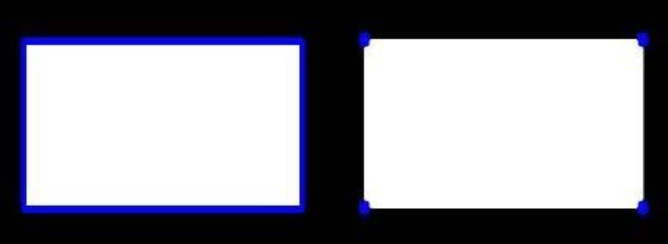

# 2. 绘制轮廓

## 2.1 图像二值化

In [1]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline  

def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [2]:
img = cv2.imread('01_Picture/08_Car.png')
cv_show(img,'img')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 大于 17 的取 255，小于 127 的取 0       
cv_show(thresh,'thresh')

## 2.2 轮廓检测

In [3]:
# 做完二值后，再用图像轮廓检测函数再去做
binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv_show(binary,'binary') # 返回的二值化后的图像
print(np.array(contours).shape) # 轮廓点的信息
print(hierarchy) # hierarchy 是把轮廓结果保存在层级结构当中，暂时用不上

(2579,)
[[[   1   -1   -1   -1]
  [   2    0   -1   -1]
  [   3    1   -1   -1]
  ...
  [  -1 2575 2577   -1]
  [2578   -1   -1 2576]
  [  -1 2577   -1 2576]]]


D:\11_Anaconda\envs\py3.6.3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


## 2.3 绘制所有轮廓

In [4]:
# 传入参数：图像、轮廓、轮廓索引(自适应，画所有轮廓)，颜色模式，线条厚度
# 注意需要copy，要不原图会变。。。
cv_show(img,'img')
draw_img = img.copy() # 若不用拷贝后的，而是用原图画轮廓，则画轮廓图绘把原始的输入图像重写，覆盖掉 
res = cv2.drawContours(draw_img,contours,-1,(0,0,255),2) 
cv_show(res,'res')

## 2.4 绘制某个轮廓

In [5]:
draw_img = img.copy()
res = cv2.drawContours(draw_img,contours,70,(0,0,255),2) # 画 70 号轮廓
cv_show(res,'res')

## 2.5 综合展示

In [6]:
img = cv2.imread('01_Picture/10_contours.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 大于17的取255，小于127的取0       

binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

draw_img = img.copy() # 若不用拷贝后的，而是用原图画轮廓，则画轮廓图绘把原始的输入图像重写，覆盖掉 
res = cv2.drawContours(draw_img,contours,3,(0,0,255),2) 
cv_show(res,'res')

# 3. 轮廓特征提取

In [7]:
img = cv2.imread('01_Picture/10_contours.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 大于17的取255，小于127的取0       

binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cnt = contours[0] # 通过轮廓索引，拿到该索引对应的轮廓特征
print(cv2.contourArea(cnt)) # 该轮廓的面积
print(cv2.arcLength(cnt,True)) # 该轮廓的周长，True表示闭合的

8500.5
437.9482651948929


# 4. 轮廓近似

① 正常轮廓展示是最右边的图，但是当我们需要轮廓没有那么不规则，而是想要轮廓近似成规则的形状，这就叫轮廓近似，近似成下图中中间图像的轮廓。

② 一条呈抛物线的曲线的端点为 A、B 两点，取曲线上到直线 AB 距离最大的点，该点为 C 点，若 C 点到直线的距离小于设置的阈值，则可以把直线 AB 当做曲线的近似，若 C 点到直线的距离大于设置的阈值，那么曲线不能用直线 AB 来近似，而 AC 曲线可能用 AC 直线来代替、BC曲线可能用 BC 直线来代替。再通过阈值来判断是否可以代替。

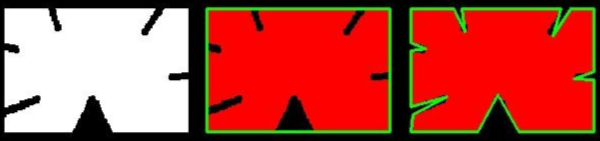

## 4.1 正常轮廓展示

In [8]:
img = cv2.imread('01_Picture/11_contours2.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 大于17的取255，小于127的取0       

binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

draw_img = img.copy() # 若不用拷贝后的，而是用原图画轮廓，则画轮廓图绘把原始的输入图像重写，覆盖掉 
res = cv2.drawContours(draw_img,contours,-1,(0,0,255),2) 
cv_show(res,'res')

## 4.2 轮廓近似展示

In [9]:
img = cv2.imread('01_Picture/11_contours2.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 大于17的取255，小于127的取0       
binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img,[cnt],-1,(0,0,255),2) 
cv_show(res,'res')

In [10]:
epsilon = 0.1 * cv2.arcLength(cnt,True) # 周长的百分比，这里用 0.1 的周长作阈值
approx = cv2.approxPolyDP(cnt,epsilon,True) # 第二个参数为阈值
draw_img = img.copy()
res = cv2.drawContours(draw_img,[approx],-1,(0,0,255),2)
cv_show(res,'res')

# 5. 外接矩形

In [11]:
img = cv2.imread('01_Picture/10_contours.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 大于17的取255，小于127的取0       
binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[6]

x,y,w,h = cv2.boundingRect(cnt) # 可以得到矩形四个坐标点的相关信息
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255),2)
cv_show(img,'img')

In [12]:
area = cv2.contourArea(cnt)
rect_area = w * h
extent = float(area) / rect_area
print('轮廓面具与边界矩形比：',extent)

轮廓面具与边界矩形比： 0.7732441471571906


# 6. 外接圆

In [13]:
img = cv2.imread('01_Picture/10_contours.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 大于17的取255，小于127的取0       
binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
(x,y),redius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
redius = int(redius)
img = cv2.circle(draw_img,center,redius,(0,255,0),2)
cv_show(img,'img')